Let's see how we do with xgboost

In [103]:
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

from xgboost import XGBClassifier
# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Function for splitting training and test set
from sklearn.model_selection import train_test_split
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline
# For standardization
from sklearn.preprocessing import StandardScaler
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

Let's load in the dataset from the processed data folder.

In [69]:
df = pd.read_csv('../../data/processed/model_dataset.csv')
df.head()

,Unnamed: 0,Season,LowID,HighID,Win,LowScore,LowFGP,LowFGP3,LowFTP,LowOR,...,HighFTP,HighOR,HighDR,HighAst,HighTO,HighStl,HighBlk,HighPF,HighRank,HighSeed
0,0,2003,1411,1421,0,72.800000,0.448892,0.321414,0.613745,13.166667,...,0.766142,12.275862,23.172414,13.034483,16.206897,7.068966,3.000000,19.103448,240.343750,16.0
1,1,2003,1112,1436,1,85.214286,0.463563,0.351060,0.701154,15.178571,...,0.649708,12.965517,25.724138,14.206897,14.068966,6.862069,2.965517,15.896552,153.125000,16.0
2,2,2003,1113,1272,1,75.965517,0.481680,0.328376,0.675667,13.689655,...,0.628299,14.068966,25.965517,16.620690,13.793103,7.379310,5.068966,18.758621,21.705882,7.0
3,3,2003,1141,1166,1,79.344828,0.506349,0.377481,0.762741,10.586207,...,0.689707,10.878788,23.181818,16.818182,13.363636,8.393939,4.454545,17.272727,20.735294,6.0
4,4,2003,1143,1301,1,74.482759,0.468741,0.375934,0.688632,11.241379,...,0.778148,9.733333,22.033333,14.666667,14.200000,7.766667,3.066667,18.666667,50.312500,9.0


In [70]:
df.columns.values

array(['Unnamed: 0', 'Season', 'LowID', 'HighID', 'Win', 'LowScore',
       'LowFGP', 'LowFGP3', 'LowFTP', 'LowOR', 'LowDR', 'LowAst', 'LowTO',
       'LowStl', 'LowBlk', 'LowPF', 'LowRank', 'LowSeed', 'HighScore',
       'HighFGP', 'HighFGP3', 'HighFTP', 'HighOR', 'HighDR', 'HighAst',
       'HighTO', 'HighStl', 'HighBlk', 'HighPF', 'HighRank', 'HighSeed'],
      dtype=object)

In [71]:
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,Season,LowID,HighID,Win,LowScore,LowFGP,LowFGP3,LowFTP,LowOR,LowDR,...,HighFTP,HighOR,HighDR,HighAst,HighTO,HighStl,HighBlk,HighPF,HighRank,HighSeed
0,2003,1411,1421,0,72.800000,0.448892,0.321414,0.613745,13.166667,24.800000,...,0.766142,12.275862,23.172414,13.034483,16.206897,7.068966,3.000000,19.103448,240.343750,16.0
1,2003,1112,1436,1,85.214286,0.463563,0.351060,0.701154,15.178571,27.642857,...,0.649708,12.965517,25.724138,14.206897,14.068966,6.862069,2.965517,15.896552,153.125000,16.0
2,2003,1113,1272,1,75.965517,0.481680,0.328376,0.675667,13.689655,23.310345,...,0.628299,14.068966,25.965517,16.620690,13.793103,7.379310,5.068966,18.758621,21.705882,7.0
3,2003,1141,1166,1,79.344828,0.506349,0.377481,0.762741,10.586207,23.275862,...,0.689707,10.878788,23.181818,16.818182,13.363636,8.393939,4.454545,17.272727,20.735294,6.0
4,2003,1143,1301,1,74.482759,0.468741,0.375934,0.688632,11.241379,24.379310,...,0.778148,9.733333,22.033333,14.666667,14.200000,7.766667,3.066667,18.666667,50.312500,9.0


We need to split the data so it's the target and input features.

In [72]:
# Create separate object for target variable
y = df.Win

# Create separate object for input features
X = df.drop('Win', axis=1)

Split into training and test data with 20% of the observations going to the test set. We also give it a random state so we can reproduce the results.

In [73]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

892 223 892 223


Ok time for pipelines. 

In [74]:
# Pipeline dictionary
pipelines = {
    'xg': make_pipeline(StandardScaler(),XGBClassifier(random_state=123)),
    'gb': make_pipeline(StandardScaler(),GradientBoostingClassifier(random_state=123))
            }

In [75]:
# Boosted Tree hyperparameters
gb_hyperparameters = {'gradientboostingclassifier__n_estimators': [200],
                     'gradientboostingclassifier__learning_rate': [0.05],
                     'gradientboostingclassifier__max_depth': [1]}

In [76]:
# Boosted Tree hyperparameters
xg_hyperparameters = {
'xgbclassifier__max_depth': range (2, 10, 1),
    'xgbclassifier__n_estimators': range(60, 220, 40),
    'xgbclassifier__learning_rate': [0.1, 0.01, 0.05]
}

In [77]:
# Create hyperparameters dictionary
hyperparameters = {
    'xg': xg_hyperparameters,
    'gb': gb_hyperparameters
}

In [78]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1, scoring='neg_log_loss')
    
    # Fit model on X_train, y_train
    model.fit(X_train,y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted')

xg has been fitted
gb has been fitted


In [79]:
fitted_models['xg']

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
                                                      learning_rate=0.1,
                                                      max_delta_step=0,
                     

In [80]:
model_xg = fitted_models['xg']

In [81]:
y_pred = model_xg.predict(X_test)
predictions = [round(value) for value in y_pred]

In [82]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.6905829596412556


If I play around by hand I can get a little bit better accuracy.

In [83]:
model = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.5, max_delta_step=2, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=300, nthread=-1,reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [84]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=2, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              silent=True, subsample=1, verbosity=1)

In [85]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [86]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.7130044843049327


That seems to be pretty decent. Most of the values that I was playing with gave me somewhere between 66 and 70. Let's check it against the winning gradient boosting model from 3.0-theberling-classifier.ipynb

In [87]:
model2 = GradientBoostingClassifier(n_estimators=200,learning_rate=0.05,max_depth=1)

In [88]:
model2.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [89]:
y_pred2 = model2.predict(X_test)
predictions2 = [round(value) for value in y_pred2]

In [90]:
accuracy2 = accuracy_score(y_test, predictions2)
print(accuracy2)

0.6860986547085202


Let's run it on our submission data set and see what happens.

In [91]:
data = pd.read_csv('../../data/processed/model_dataset2.csv')
data.head()

,Season,LowID,HighID,LowScore,LowFGP,LowFGP3,LowFTP,LowOR,LowDR,LowAst,...,HighFTP,HighOR,HighDR,HighAst,HighTO,HighStl,HighBlk,HighPF,HighRank,HighSeed
0,2015,1107,1112,65.5,0.44403,0.358773,0.728865,10.0,23.625,10.4375,...,0.699585,10.823529,26.411765,14.205882,11.205882,7.176471,3.588235,17.911765,4.209677,2.0
1,2015,1107,1116,65.5,0.44403,0.358773,0.728865,10.0,23.625,10.4375,...,0.717672,13.000000,22.764706,16.147059,11.735294,7.764706,4.764706,18.970588,22.306452,5.0
2,2015,1107,1124,65.5,0.44403,0.358773,0.728865,10.0,23.625,10.4375,...,0.668958,14.500000,24.031250,14.406250,12.375000,8.031250,3.843750,16.718750,14.177419,3.0
3,2015,1107,1125,65.5,0.44403,0.358773,0.728865,10.0,23.625,10.4375,...,0.695699,9.322581,23.967742,15.193548,13.741935,6.354839,1.967742,16.451613,129.724138,15.0
4,2015,1107,1129,65.5,0.44403,0.358773,0.728865,10.0,23.625,10.4375,...,0.729914,8.516129,24.032258,11.709677,10.225806,5.967742,2.322581,17.225806,46.700000,11.0


In [92]:
predictions = model.predict(data)
predictions

array([0, 0, 0, ..., 1, 1, 1])

In [93]:
probs = model.predict_proba(data)
probs

array([[9.9958932e-01, 4.1067391e-04],
       [9.9694955e-01, 3.0504181e-03],
       [9.8525810e-01, 1.4741913e-02],
       ...,
       [3.7697077e-01, 6.2302923e-01],
       [7.4967623e-02, 9.2503238e-01],
       [2.4914742e-03, 9.9750853e-01]], dtype=float32)

In [94]:
prob_of_1 = probs[:,1]
prob_of_1

array([4.1067391e-04, 3.0504181e-03, 1.4741913e-02, ..., 6.2302923e-01,
       9.2503238e-01, 9.9750853e-01], dtype=float32)

In [95]:
def make_id(row):
    season = row[0]
    low_id = row[1]
    high_id = row[2]
    ID = str(int(season))+'_'+str(int(low_id))+'_'+str(int(high_id))
    return ID

In [96]:
ID = data.apply(make_id,axis=1)

In [97]:
df_submission = pd.DataFrame()

In [98]:
df_submission['ID'] = ID
df_submission['Pred'] = prob_of_1
df_submission.head()

,ID,Pred
0,2015_1107_1112,0.000411
1,2015_1107_1116,0.003050
2,2015_1107_1124,0.014742
3,2015_1107_1125,0.382413
4,2015_1107_1129,0.019238


In [99]:
df_submission.to_csv('../../data/predictions/phase1_submissions1.csv',index=False)

Out of curiousity let's look at the feature importance.

In [101]:
model.feature_importances_

array([0.03146582, 0.01729223, 0.03966459, 0.02340968, 0.02377614,
       0.01790036, 0.01732793, 0.02330148, 0.02813162, 0.01434183,
       0.02051554, 0.02175453, 0.03215117, 0.02834774, 0.12155508,
       0.05308059, 0.03211567, 0.02661302, 0.03120742, 0.03798025,
       0.02072252, 0.02875813, 0.01324859, 0.02362966, 0.02229764,
       0.02548161, 0.02466678, 0.08405766, 0.11520471], dtype=float32)

In [108]:
feature_names = X.columns

<BarContainer object of 29 artists>

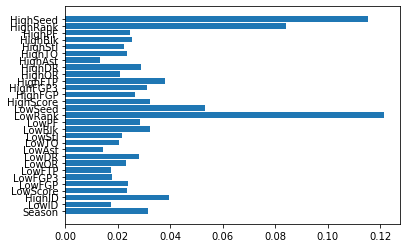

In [110]:
plt.barh(feature_names, model.feature_importances_)

What about gradient boost?

In [111]:
model2.feature_importances_

array([0.        , 0.        , 0.03055075, 0.        , 0.00193097,
       0.        , 0.00085912, 0.        , 0.        , 0.        ,
       0.00097347, 0.01582998, 0.00704001, 0.0280044 , 0.45740298,
       0.0224508 , 0.00098569, 0.        , 0.00287938, 0.00685016,
       0.00183965, 0.01485217, 0.        , 0.        , 0.01277217,
       0.00336295, 0.00182212, 0.1588486 , 0.23074463])

<BarContainer object of 29 artists>

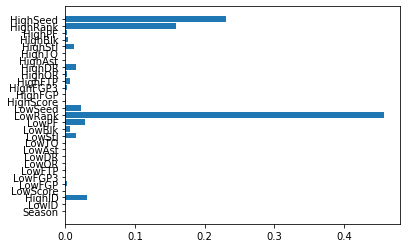

In [112]:
plt.barh(feature_names, model2.feature_importances_)